In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

In [2]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [3]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [4]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [5]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [6]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

609

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [9]:
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + "i"

In [10]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 13 | bredasdorp
Processing Record 2 of Set 13 | samarai
Processing Record 3 of Set 13 | jacareacanga
Processing Record 4 of Set 13 | illoqqortoormiut
City not found. Skipping...
Processing Record 5 of Set 13 | namibe
Processing Record 6 of Set 13 | rikitea
Processing Record 7 of Set 13 | puerto ayora
Processing Record 8 of Set 13 | bobcaygeon
Processing Record 9 of Set 13 | taolanaro
City not found. Skipping...
Processing Record 10 of Set 13 | prabumulih
Processing Record 11 of Set 13 | labuan
Processing Record 12 of Set 13 | nguiu
City not found. Skipping...
Processing Record 13 of Set 13 | busselton
Processing Record 14 of Set 13 | kapaa
Processing Record 15 of Set 13 | port keats
Processing Record 16 of Set 13 | tezu
Processing Record 17 of Set 13 | karratha
Processing Record 18 of Set 13 | fayetteville
Processing Record 19 of Set 13 | sibay
Processing Record 20 of Set 13 | jamestown
Processing Record 21 of Set 13 | mar del plata
Processing Record 22 of Se

Processing Record 35 of Set 16 | tugulym
Processing Record 36 of Set 16 | zhigansk
Processing Record 37 of Set 16 | vilyuysk
Processing Record 38 of Set 16 | albany
Processing Record 39 of Set 16 | esperance
Processing Record 40 of Set 16 | jodar
Processing Record 41 of Set 16 | airai
Processing Record 42 of Set 16 | inhambane
Processing Record 43 of Set 16 | ust-nera
Processing Record 44 of Set 16 | luganville
Processing Record 45 of Set 16 | bahia blanca
Processing Record 46 of Set 16 | amderma
City not found. Skipping...
Processing Record 47 of Set 16 | mataura
Processing Record 48 of Set 16 | matay
Processing Record 49 of Set 16 | smidovich
Processing Record 50 of Set 16 | nyirbogdany
Processing Record 1 of Set 17 | cabo san lucas
Processing Record 2 of Set 17 | waitara
Processing Record 3 of Set 17 | gandhidham
Processing Record 4 of Set 17 | sitka
Processing Record 5 of Set 17 | hawera
Processing Record 6 of Set 17 | doka
Processing Record 7 of Set 17 | grand river south east
Cit

Processing Record 22 of Set 20 | pangnirtung
Processing Record 23 of Set 20 | glenwood springs
Processing Record 24 of Set 20 | kamaishi
Processing Record 25 of Set 20 | lungi
Processing Record 26 of Set 20 | ilo
Processing Record 27 of Set 20 | powassan
Processing Record 28 of Set 20 | haines junction
Processing Record 29 of Set 20 | carikar
City not found. Skipping...
Processing Record 30 of Set 20 | hurghada
Processing Record 31 of Set 20 | mountain home
Processing Record 32 of Set 20 | nam tha
City not found. Skipping...
Processing Record 33 of Set 20 | zeya
Processing Record 34 of Set 20 | zhanatas
City not found. Skipping...
Processing Record 35 of Set 20 | hambantota
Processing Record 36 of Set 20 | senneterre
Processing Record 37 of Set 20 | mount gambier
Processing Record 38 of Set 20 | lyudinovo
Processing Record 39 of Set 20 | yarmouth
Processing Record 40 of Set 20 | zelenogorskiy
Processing Record 41 of Set 20 | calvinia
Processing Record 42 of Set 20 | santa lucia
Process

Processing Record 13 of Set 24 | kirakira
Processing Record 14 of Set 24 | bonavista
Processing Record 15 of Set 24 | minsk mazowiecki
Processing Record 16 of Set 24 | santo antonio do ica
Processing Record 17 of Set 24 | almaznyy
Processing Record 18 of Set 24 | kuching
Processing Record 19 of Set 24 | nur
Processing Record 20 of Set 24 | gallipoli
Processing Record 21 of Set 24 | plouzane
Processing Record 22 of Set 24 | coahuayana
Processing Record 23 of Set 24 | coihaique
Processing Record 24 of Set 24 | yangambi
Processing Record 25 of Set 24 | dakoro
Processing Record 26 of Set 24 | virginia beach
Processing Record 27 of Set 24 | shingu
Processing Record 28 of Set 24 | novikovo
Processing Record 29 of Set 24 | onokhino
Processing Record 30 of Set 24 | brownsville
Processing Record 31 of Set 24 | wajima
Processing Record 32 of Set 24 | san policarpo
Processing Record 33 of Set 24 | hobe sound
Processing Record 34 of Set 24 | kemi
Processing Record 35 of Set 24 | zychlin
Processing

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bredasdorp,-34.53,20.04,59.00,67,76,17.22,ZA,2020-11-08 16:57:35
1,Samarai,-10.62,150.67,80.44,83,58,15.86,PG,2020-11-08 16:57:35
2,Jacareacanga,-6.22,-57.75,96.78,41,62,3.78,BR,2020-11-08 16:57:36
3,Namibe,-15.20,12.15,71.11,69,41,8.19,AO,2020-11-08 16:57:36
4,Rikitea,-23.12,-134.97,71.78,79,91,19.80,PF,2020-11-08 16:57:36
5,Puerto Ayora,-0.74,-90.35,73.40,78,75,12.75,EC,2020-11-08 16:57:36
6,Bobcaygeon,44.55,-78.54,66.20,52,1,5.82,CA,2020-11-08 16:57:36
7,Prabumulih,-3.45,104.25,74.95,95,100,2.08,ID,2020-11-08 16:57:37
8,Labuan,5.28,115.24,75.20,94,40,1.12,MY,2020-11-08 16:57:37
9,Busselton,-33.65,115.33,57.00,72,24,11.52,AU,2020-11-08 16:57:37


In [24]:
#creating a new column order for dataframe
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]

In [25]:
#updated column order for city dataframe
city_data_df = city_data_df[new_column_order]

In [26]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bredasdorp,ZA,2020-11-08 16:57:35,-34.53,20.04,59.00,67,76,17.22
1,Samarai,PG,2020-11-08 16:57:35,-10.62,150.67,80.44,83,58,15.86
2,Jacareacanga,BR,2020-11-08 16:57:36,-6.22,-57.75,96.78,41,62,3.78
3,Namibe,AO,2020-11-08 16:57:36,-15.20,12.15,71.11,69,41,8.19
4,Rikitea,PF,2020-11-08 16:57:36,-23.12,-134.97,71.78,79,91,19.80
5,Puerto Ayora,EC,2020-11-08 16:57:36,-0.74,-90.35,73.40,78,75,12.75
6,Bobcaygeon,CA,2020-11-08 16:57:36,44.55,-78.54,66.20,52,1,5.82
7,Prabumulih,ID,2020-11-08 16:57:37,-3.45,104.25,74.95,95,100,2.08
8,Labuan,MY,2020-11-08 16:57:37,5.28,115.24,75.20,94,40,1.12
9,Busselton,AU,2020-11-08 16:57:37,-33.65,115.33,57.00,72,24,11.52


In [27]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [28]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [29]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'11/08/20'

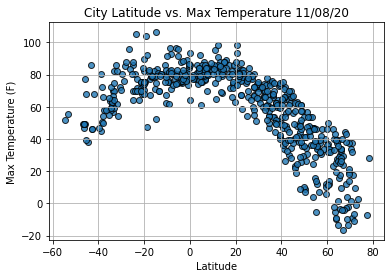

In [18]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

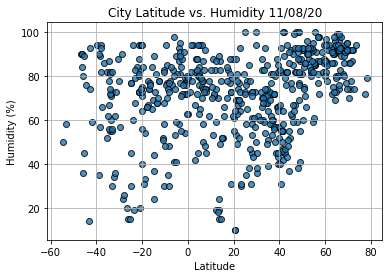

In [19]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

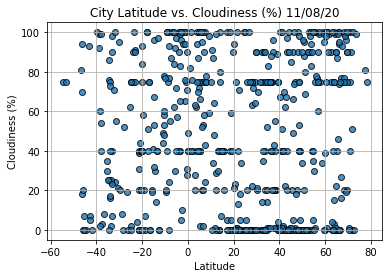

In [20]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

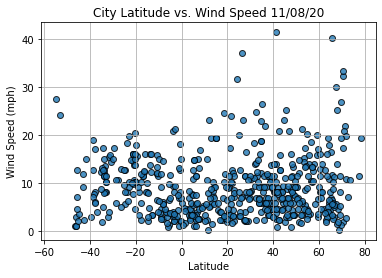

In [21]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [22]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    #Run regression on hemisphere weather data
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept
    regress_values = x_values * slope + intercept
    # Get the equation of the line
    line_eq = "y = " + str(round(slop,2)) + "x " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [23]:
index13 = city_data_df.loc[13]
index13

City                     Karratha
Country                        AU
Date          2020-11-08 16:57:37
Lat                        -20.74
Lng                        116.85
Max Temp                    70.16
Humidity                       83
Cloudiness                      0
Wind Speed                  13.71
Name: 13, dtype: object

In [30]:
city_data_df["Lat"] >= 0

0      False
1      False
2      False
3      False
4      False
       ...  
567    False
568     True
569    False
570    False
571     True
Name: Lat, Length: 572, dtype: bool

In [31]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
6,Bobcaygeon,CA,2020-11-08 16:57:36,44.55,-78.54,66.20,52,1,5.82
8,Labuan,MY,2020-11-08 16:57:37,5.28,115.24,75.20,94,40,1.12
10,Kapaa,US,2020-11-08 16:57:37,22.08,-159.32,78.80,74,40,12.75
12,Tezu,IN,2020-11-08 16:57:37,27.92,96.17,67.46,45,0,4.07
14,Fayetteville,US,2020-11-08 16:55:54,35.05,-78.88,75.20,64,1,9.17
...,...,...,...,...,...,...,...,...,...
563,Cherepet,RU,2020-11-08 16:58:58,54.12,36.38,46.40,87,90,13.42
564,Ormara,PK,2020-11-08 16:58:59,25.21,64.64,77.65,58,0,8.12
565,Seymchan,RU,2020-11-08 16:58:59,62.88,152.43,-2.49,91,100,3.69
568,Massakory,TD,2020-11-08 16:58:59,13.00,15.73,85.21,18,30,8.75


In [41]:
# Import linear regression from the SciPy stats module
from scipy.stats import linregress

In [53]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    #Run regression on hemisphere weather data
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept
    regress_values = x_values * slope + intercept
    # Get the equation of the line
    line_eq = "y = " + str(round(slope,2)) + "x " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [54]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

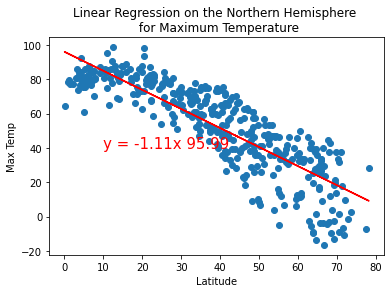

In [55]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,40))

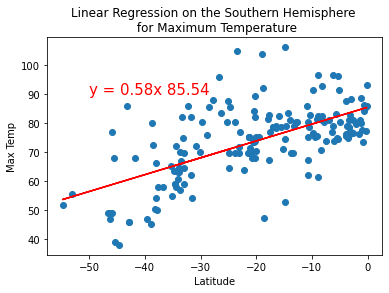

In [56]:
#Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

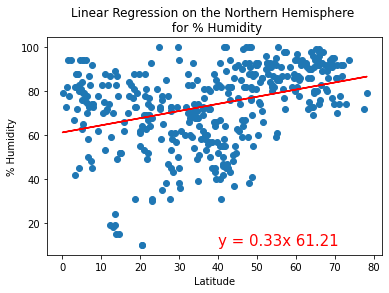

In [57]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

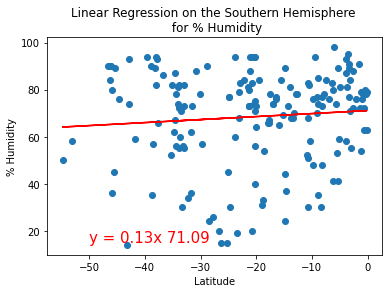

In [58]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

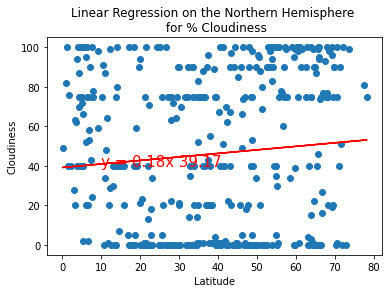

In [60]:
# skill drill
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n for % Cloudiness', 'Cloudiness',(10,40))

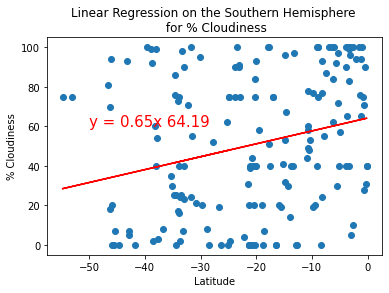

In [61]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

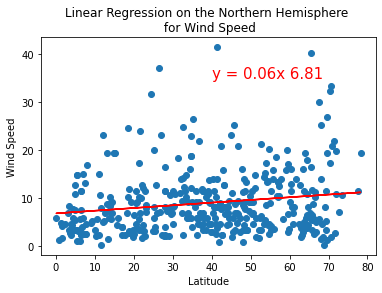

In [62]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

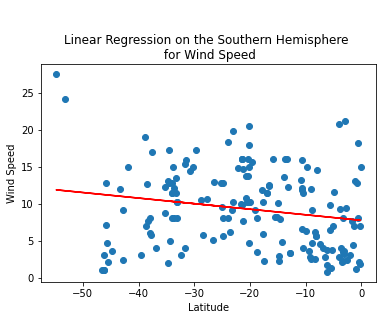

In [63]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))